# Zadatak 3 - Klasični algoritam mašinskog učenja

a) Sam skup podataka dolazi spreman uz Sklearn, te ga je potrebno učitati:

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Nazivi znacajki:", feature_names)
print("Nazivi labela:", target_names)
print("\nPrvih 5 redova X:\n", X[:5])

Nazivi znacajki: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nazivi labela: ['setosa' 'versicolor' 'virginica']

Prvih 5 redova X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


- Ovim kodom imamo uvid u strukturu i sadržaj učitanog skupa podataka. Ovaj skup podataka sadrži informacije o dužini i širini latica cvijeta iris, te razvrstava cvjetove u tri klase: Setosa, Versicolour i Virginica.

b) Sljedeći korak jeste dijeljenje skupa podataka na dva dijela - trening i testni skup. Trening skup se koristi
kako bi algoritam naučio uzorke ponašanja, dok testni skup predstavlja nove podatke, na osnovu kojih se vrši
evaluacija algoritma (to jeste evaluacija naučenog). Dijeljenje skupa podataka se vrši na ranije opisani način:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


- Koja funkcija je korištena za podjelu skupa podataka?

  Korištena je funkcija 'train_test_split' iz 'sklearn.model_selection'.
- Koje parametre prima
ova funkcija?
  Ova funkcija prima:
  - array (skup podataka koji će biti podijeljen na trening i testne skupove),
  - test_size (opc. par. koji predstavlja proporciju skupa podataka koje želimo uključiti u testni skup),
  - train_size (opc. par. koji određuje veličinu trening skupa),
  - random_state (opc. par. koji kontroliše miješanje podataka prije primjene podjele),
  - shuffle(opc. par. koji određuje hoće li se podaci miješati prije podjele),
  - stratify (opc. par. koji ako nije None podatke dijeli na stratificiran način koristeći ovo kao oznake klasa)
- Koji je oblik novonastalih skupova?

  Dimenzije 'X_traina' su broj uzoraka u trening skupu, 'X_testa' su broj uzoraka u testnom skupu, 'Y_train' su broj uzoraka u trening skupu, 'Y_test' su broj uzoraka u testnom skupu.
  
  S tim da se 'X_train' i 'X_test' koriste za obuku i evaluaciju modela jer sadrže informacije o atributima uzoraka, dok 'Y_train' i 'Y_test' se koriste za provjeru performansi modela u predviđanju ciljnih klasa.
- Da li je ovo veliki skup podataka? Zašto jeste/nije?

  U odnosu na druge skupove podataka, skup podataka irisa se smatra relativno malim, ali je dovoljan za klasične primjene mašinskog učenja i pogodan je za demonstracijske svrhe i učenje.

c) Sada je vrijeme da se primijeni odgovarajući algoritam. U ovom primjeru, koristit ćemo k-NN (eng. k-nearest
neighbours). Ovaj algoritam je izuzetno jednostavan, te klasifikaciju vrši na način da svaki podatak mapira kao
n-dimenzionalnu tačku. Klasa novog podatka se zatim određuje na osnovu k najbližih tačaka u tom prostoru.
Uzima se ona klasa koja se pojavljuje najčešće u k najbližih susjeda. Ovaj algoritam je već implementiran u
sklopu Sklearn, pa se može jednostavno pozvati:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_knn = KNeighborsClassifier(n_neighbors = 3)

classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- Na koji način se učitava k-NN? Koja je vrijednost k?

  Klasifikator k-NN se učitava stvaranjem instance klase 'KNeighborsClassifier' s parametrom 'n_neighbors' postavljenim na 3. Ovo znači da će se za klasifikaciju koristiti 3 najbliža susjeda.

d) Konačno, potrebno je algoritam primijeniti nad testnim skupom, kako bi se odredila uspješnost. U tu svrhu,
koristi se isječak koda kao što slijedi:

In [ ]:
y_pred = classifier_knn.predict(X_test)

print("Tacnost:", metrics.accuracy_score(y_test, y_pred))

Tacnost: 0.9777777777777777


- Koja je tačnost ovog algoritma?
  
  Za ovaj primjer tačnost je : 0.9777777777777777
  Tačnost algoritma k-najbližih susjeda predstavlja procjenu koliko je dobar klasifikator u predviđanju klasa uzoraka u testnom skupu podataka. Tačnost se izračunava uspoređivanjem stvarnih klasa uzoraka (koje su poznate, jer se nalaze u testnom skupu) s klasama koje je algoritam predvidio za te uzorke. Ako algoritam tačno klasificira većinu uzoraka, tačnost će biti visoka, a ako su predikcije netačne za većinu uzoraka, tačnost će biti niska. Ova tačnost pruža mjeru koliko dobro algoritam k-NN funkcionira na tom određenom testnom skupu podataka.
- Da li je ovo zadovoljavajuća tačnost?
  
  Tačnost od 0.9777 može se smatrati vrlo visokom. U mnogim situacijama, tačnost od oko 98% bi bila zadovoljavajuća i sugerira da algoritam k-najbližih susjeda dobro generalizira na novim podacima.

  
- Da li je ovakav algoritam primjenjiv u
stvarnom svijetu?

  Algoritam k-najbližih susjeda može biti primjenjiv u stvarnom svijetu, ali njegova primjenjivost ovisi o specifičnosti problema I prirodi podataka.

e) Ponovite ovaj proces za nekoliko različitih vrijednosti k.
- Da li se rezultat mijenja? Ako da, da li su drastične
promjene, i koja je 'optimalna' vrijednost k?

  Ako se proces ponovi za različite vrijednosti k, rezultat će se mijenjati. Za sve veće vrijednosti k procenat tačnosti opada.
- Šta bi se desilo ukoliko bismo postavili da je vrijednost k jednaka
broju uzoraka u testnom skupu podataka?

  To bi značilo da se za klasifikaciju uzima cijeli testni skup kao najbliži susjed, što može dovesti do overfittinga.

# Zadatak 4 - Duboko učenje

Duboko učenje ćemo demonstrirati na primjeru klasifikacije rukom pisanih cifara. Koristit ćemo MNIST skup podataka, koji sadrži 70000 slika u nijansama sive boje (eng. grayscale) dimenzija 28 × 28 podijeljenih u 10 različitih klasa (za svaku cifru po jedna).

a) Učitavanje podataka je prvi korak. Keras ovaj skup podataka ima spreman, te je on unaprijed podijeljen na
trening i test skup. Učitavanje se može uraditi pomoću sljedećeg isječka koda:

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(y_test.shape) # broj u testnom skupu
print(y_train.shape) #broj slika u trening skupu
print(x_test.nbytes) # zauzimanje u memoriji
print(x_train.nbytes) #zauzimanje u memoriji

(10000,)
(60000,)
7840000
47040000


Koliko slika se nalazi u testnom skupu podataka, a koliko u trening skupu? Koji je oblik (shape) ovih
varijabli? Koliko bajta zauzimaju u memoriji?

Broj slika u testnom skupu podataka je 10000, dok je broj slika u trening skupu 60000.

um jednodimenzionalni niz?

Ukupna zauzeta memorija u bajtima za testni skup je 7840000 bajta, a za trening skup je 47040000 bajta.

Kako bi se ove slike mogle poslati u neuralnu mrežu, potrebno je iste prvo pretvoriti u brojeve u pokretnom
zarezu, te ih svesti na opseg između 0 i 1. Obzirom da pikseli grayscale slika uzimaju vrijednosti između 0 i
255, svođenje na traženi opseg se može uraditi prostim dijeljenjm sa 255. Sljedeći isječak koda demonstrira
ovaj korak:

In [ ]:
train_images = x_train.reshape((x_train.shape[0], 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = x_test.reshape((x_test.shape[0], 28*28))
test_images = test_images.astype('float32') / 255

print(train_images.nbytes)
print(test_images.nbytes)

188160000
31360000


Šta radi naredba reshape, a šta astype? Koliko bajta u memoriji sada zauzimaju slike za testiranje i trening?

 Naredba reshape koristi se za promjenu oblika niza, odnosno transformira dimenzije niza dok zadržava isti broj elemenata. Na primjer, ako imamo sliku dimenzija 28x28 piksela, naredba reshape može transformirati ovu sliku u niz od 784 elemenata (28 * 28), što olakšava obradu podataka u neuronskoj mreži koja zahtijeva ulaz u obliku niza.

 Naredba astype se koristi za promjenu tipa podataka u nizu. U ovom slučaju, tip podataka se mijenja u 'float32'.

c) Nakon što su podaci spremni, može se napraviti jednostavan model duboke neuralne mreže. U tu svrhu, koristi se Keras. Prije svega je potrebno kreirati sam model, nakon čega se na isti dodaju slojevi različitog tipa:

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))

Pokušajte istražiti Keras dokumentaciju, te se upoznati sa dense slojem. Koje sve parametre prima ovaj sloj? Na koji način je on povezan sa narednim slojem, te zašto za ove slojeve kažemo da su potpuno
povezani?

Parametri su : units (broj neurona u sloju), activation (aktivacijska funkcija koja se primjenjuje na izlaz sloja), input_shape (oblik ulaznih podataka), kernel_initializer i bias initializer (inicijalizacija težina i pristranosti), kernel_regularizer i bias regularizer (regularizacija težina i pristranosti). Ovaj sloj se još naziva i potpuno povezani
sloj, jer su kod njega svi ulazi spojeni sa svim izlazima prethodnog sloja. Koristi se kada povezanost može postojati između bilo koje dva atributa.


d) Kada je model definisan, on se mora pripremiti za treniranje. Kako bi to bilo moguće, model je prvo potrebno
kompajlirati. Kompajliranje modela se sastoji od odabira tri parametra:
- Funkcije gubitka (eng. loss function) - Označava kako neuralna mreža može mjeriti svoje performanse
nad trening skupom, te se na osnovu nje prilagođava prilikom procesa treniranja;
- Optimizator (eng. optimizer ) - Mehanizam na osnovu kojeg se neuralna mreža aktualizira;
- Metrike koje treba pratiti prilikom treniranja i testiranja U ovom slučaju nas zanima samo tačnost (eng.
accuracy). Za različite zadatke dubokog učenja su razvijene i različite metrike uspjeha.

Kompajliranje modela se vrši pomoću sljedećeg isječka koda:

In [ ]:
network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

e) U prethodnom koraku smo rekli da je izlaz iz neuralne mreže zapravo niz od 10 elemenata.
Shodno tome, moramo labele prilagoditi izlazu, na način da izvršimo one-hot kodiranje istih.
Kodiranje podrazumijeva pretvaranje labele iz konkretne vrijednosti u niz od n elemenata gdje su
svi elementi nula, osim elementa na indeksu koji odgovara tačnoj klasi. Primjer one-hot kodiranja je
dat u nastavku: 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] Kako bi se ovo postiglo u Python-u, može se koristiti
gotova funkcija koju pruža Keras, kao što je prikazano u nastavku:

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

Koristi se za pretvaranje vektora klasa (integer vrijednosti) u binarnu matricu klasa. Funkcija to_categorical ima sljedeće parametre:

y: Lista ili niz koji predstavlja vektor klasa koji želimo pretvoriti u binarnu matricu.

num_classes: Opcionalni parametar koji predstavlja ukupan broj klasa. Ako nije naveden, TensorFlow će automatski odrediti broj klasa na temelju najveće vrijednosti u vektoru y i dodati jedan.

dtype: Opcionalni parametar koji predstavlja očekivani tip podataka u rezultirajućoj binarnoj matrici. Zadana vrijednost je 'float32'.

f) Sada je sve spremno da se mreža trenira. Treniranje je izuzetno jednostavno, te se obavlja
pomoću jedne linije koda:

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 12ms/step - loss: 0.2675 - accuracy: 0.9223
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1065 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0702 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0508 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0386 - accuracy: 0.9885


epochs: Predstavlja koliko puta će cijeli trening skup podataka proći kroz neuronsku mrežu tokom procesa učenja. Jedna epoha znači da su svi podaci prošli kroz mrežu jednom. Povećanje broja epoha može pomoći mreži da bolje nauči obrazce u podacima, ali može dovesti i do overfittinga.

batch_size: Označava broj uzoraka podataka koji će biti proslijeđeni kroz mrežu prije nego što se ažuriraju parametri mreže (težine). Manji batch_size može rezultirati bržim učenjem, ali može biti i manje stabilan. Veći batch_size obično rezultira stabilnijim, ali sporijim učenjem.

g) Nakon što se treniranje završi, može se izvršiti evaluacija nad testnim skupom podataka:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Tacnost za testni skup:", test_acc)
train_loss, train_acc = network.evaluate(train_images, train_labels)
print("Tacnost za trening skup:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.9812
Tacnost za testni skup: 0.9811999797821045
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9936
Tacnost za trening skup: 0.9811999797821045


Kolika je tačnost nad testnim skupom podataka? Da li se drastično razlikuje od tačnosti nad trening
skupom? Da li je ovo zadovoljavajući rezultat? Zašto jeste/nije?

Rezultati su dati iznad. Nema drastične razlike, vjerujem da je rezultat zadovoljavajući, ali s obzirom da je tačnost za trening skup veća nego tačnost za testni skup, moguće da je došlo do nekog stepena overfittanja.

# Zadatak 1 - Binarna klasifikacija - Klasifikacija vina

U ovom zadatku se radi najjednostavniji oblik klasifikacije, a to je binarna klasifikacija na osnovu numeričkih podataka u vidu tekstualne datoteke. Cilj ovog zadatka je da se napravi i istrenira neuronska mreža koja će klasificirati vino na osnovu raznih karakteristika kao crno ili bijelo. Skup podataka se sastoji iz dvije datoteke, jedne za crna vina i druge za bijela.

a) Učitati podatke za crno i bijelo vino koji se nalaze u CSV datotekama winequality-red.csv i winequality-white.csv
u varijable red i white respektivno. Pri ovome postaviti parametar separator da bude znak tačka-zarez
(;). U odgovarajućim DataFrame objektima dodati novu kolonu label koja će imati vrijednost 0 za podatke
bijelog vina, a vrijednost 1 za podatke crnog vina. Nakon ovoga spojiti ih u jedan DataFrame objekat wines.

In [ ]:
import numpy as np
import pandas as pd
white = pd.read_csv('winequality-white.csv',sep=';')
red = pd.read_csv('winequality-red.csv',sep=';')
white["label"] = 0
red["label"] = 1
wines = pd.concat([red, white], ignore_index=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


b) Izvršiti prikaz osnovnih podataka spojenog skupa podataka korištenjem describe metode te nacrtati histograme korištenjem hist metode. Šta možete zaključiti o podacima?

In [ ]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

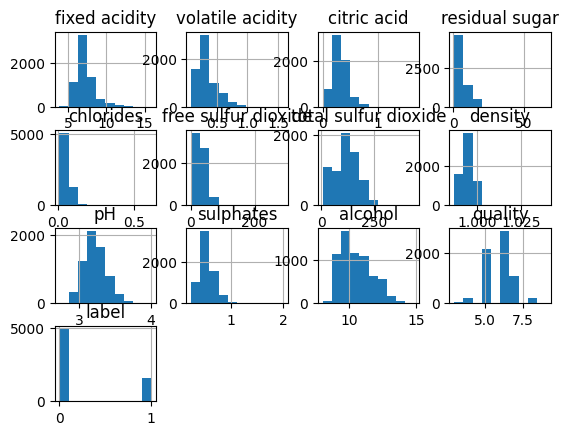

In [ ]:
wines.hist()

c) Iz wines izdvojiti X - karakteristike i y - labele. Zatim korištenjem funkcije train_test_split podijeliti
podatke na one za treniranje i one za testiranje pri čemu 20% podataka trebaju biti podaci za testiranje;

In [ ]:
from sklearn.model_selection import train_test_split

y = wines['label']
X = wines.drop('label', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

d) Formirati sekvencijalni Keras model koji će imati 2 Dense sloja sa po 8 neurona i relu aktivacijskom
funkcijom. Prvom sloju kao input_shape parametar proslijediti vrijednost (12,) s obzirom na to da skup
podataka ima 12 značajki. Treći sloj, koji je u ovom slučaju izlazni sloj, postaviti da također bude Dense, ali sa samo jednim neuronom;

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(12,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

e) Kompajlirati model tako da koristi adam optimizator, za funkciju gubitka koristiti binary_crossentropy,
a kao metriku odabrati accuracy;

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

f) Model istrenirati na 20 epoha, sa veličinom batch-a 16. Kolika je postignuta tačnost, a kolika vrijednost funkcije gubitka na kraju treniranja?

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
325/325 [==============================] - 2s 2ms/step - loss: 6.4990 - accuracy: 0.5571
Epoch 2/20
325/325 [==============================] - 1s 2ms/step - loss: 0.2149 - accuracy: 0.9269
Epoch 3/20
325/325 [==============================] - 1s 2ms/step - loss: 0.2013 - accuracy: 0.9317
Epoch 4/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1904 - accuracy: 0.9330
Epoch 5/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1839 - accuracy: 0.9340
Epoch 6/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1767 - accuracy: 0.9350
Epoch 7/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1691 - accuracy: 0.9363
Epoch 8/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1636 - accuracy: 0.9375
Epoch 9/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1582 - accuracy: 0.9396
Epoch 10/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1520 - accuracy: 0.9438

g) Ponoviti postupak1, no ovaj put prije treniranja izvršiti standardizaciju, odnosno skaliranje atributa korištenjem StandardScaler objekat iz sklearn.preprocessing modula. Kolika je sada tačnost nakon treniranja? Uporediti rezultate sa onim bez skaliranja;

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(12,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
325/325 [==============================] - 2s 3ms/step - loss: 0.3453 - accuracy: 0.9036
Epoch 2/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9844
Epoch 3/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9886
Epoch 4/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0399 - accuracy: 0.9910
Epoch 5/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9921
Epoch 6/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9925
Epoch 7/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0317 - accuracy: 0.9933
Epoch 8/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9938
Epoch 9/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.9940
Epoch 10/20
325/325 [==============================] - 1s 2ms/step - loss: 0.0277 - accuracy: 0.9938

h) Model evaluirati nad testnim skupom podataka.Kolika je postignuta tačnost modela?

In [ ]:
results = model.evaluate(X_test, y_test)

41/41 [==============================] - 1s 8ms/step - loss: 0.0120 - accuracy: 0.9985
